In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import LinearSVR
#PCA
from sklearn.decomposition import PCA
#Support vector machine regressor
from sklearn.svm import SVR

In [2]:
os.getcwd()

'/home/ibrahim/Repos/-Graduate-Admission-analysis'

In [3]:
df1 = pd.read_csv('Admission_Predict.csv') 
df2 = pd.read_csv('Admission_Predict_Ver1.1.csv') 

In [4]:
df1.shape

(400, 9)

In [5]:
df=pd.concat([df1,df2],axis=0)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
sns.set(font_scale=1.3,color_codes=True,context={"lines.linewidth":2.5})

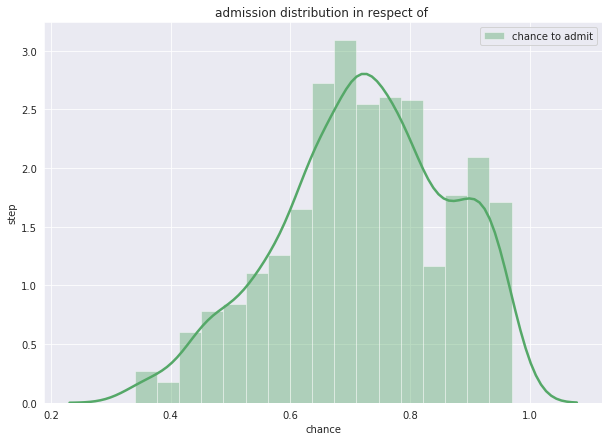

In [8]:
plt.figure(figsize=(10,7))
plt.title('admission distribution in respect of ')
plt.ylabel('step')
sns.distplot(df['Chance of Admit '],label='chance to admit',color='g')
plt.xlabel('chance')
plt.legend()

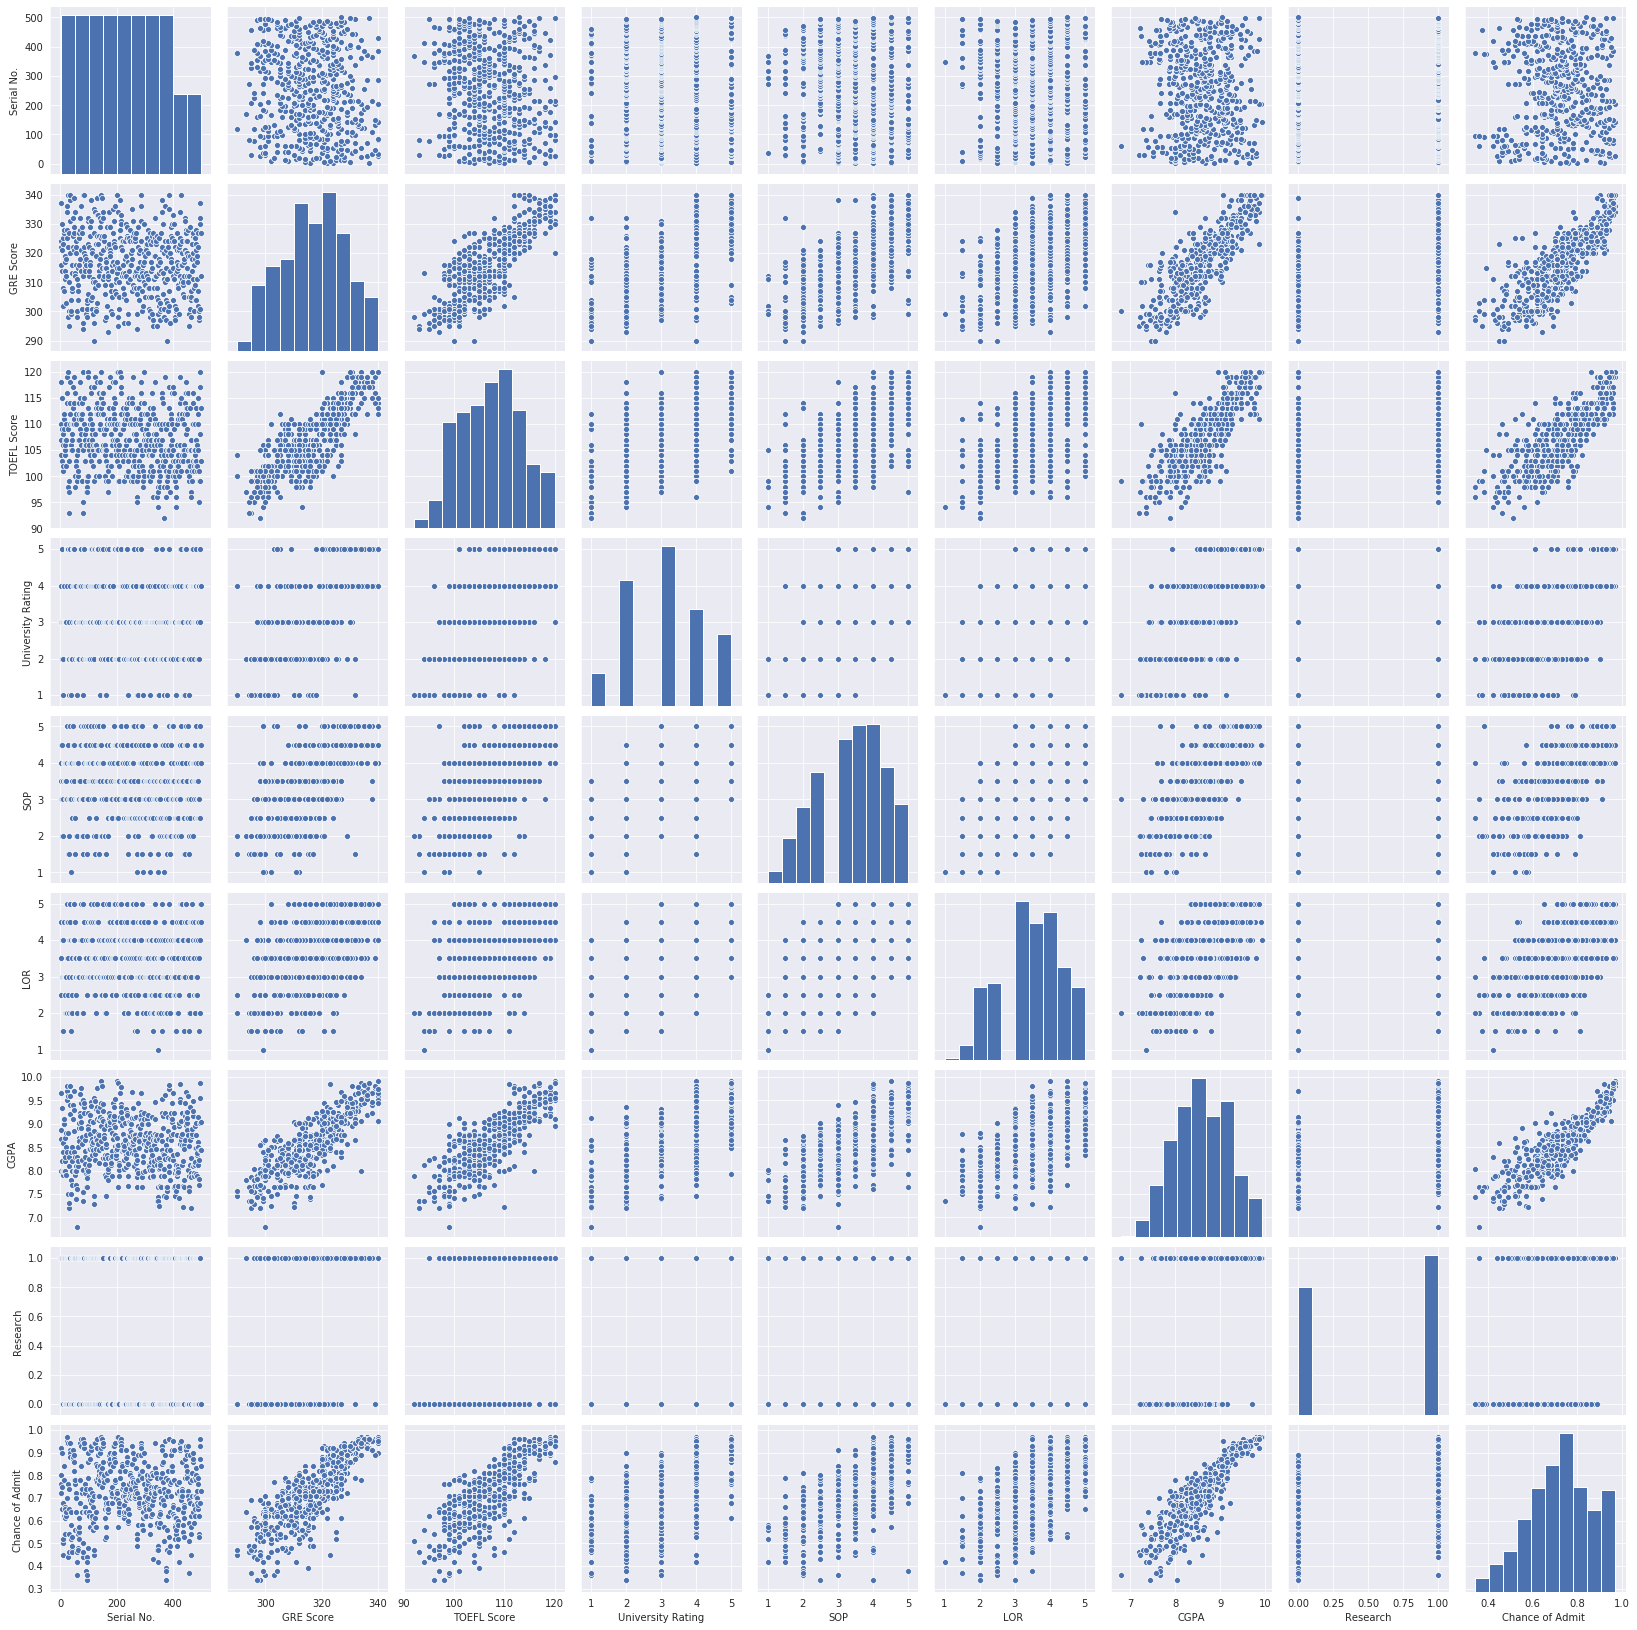

In [15]:
sns.pairplot(df)

In [ ]:
fig=plt.figure(figsize=(10,7))
sns.jointplot(df['GRE Score'],df['Chance of Admit '],color='red')
plt.title('some anlytics')

In [ ]:
plt.figure(figsize=(12,6.5))
sns.boxplot(df['TOEFL Score'],df['Chance of Admit '],width=0.5,dodge=False)

In [ ]:
#ploting each grade in respect of parent degree
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='TOEFL Score',y='Chance of Admit ',data=df1,color='lime')
sns.pointplot(x='TOEFL Score',y='Chance of Admit ',data=df2,color='blue')
plt.text(0.9,0.8,'sample2',color='lime',fontsize = 17,style = 'italic')
plt.text(0.9,0.77,'sample1',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('score',fontsize = 15,color='blue')
plt.ylabel('admission',fontsize = 15,color='blue')
plt.title('admission in respect of TOEFL SCORE',fontsize = 20,color='blue')

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['GRE Score'],rug=True, rug_kws={"color": "k"},kde_kws={"color": "r", "lw": 3, "label": "GRE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "y"})
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation between all features',color='r',animated=True,fontsize=18,fontstyle= 'italic')
#so we realize we have to drop Serial NO.

In [ ]:
#preprocessing


In [ ]:
#['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research', 'Chance of Admit ']
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]
y=df['Chance of Admit ']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=55)

In [ ]:
y_train.shape

In [ ]:
#let's start with regression models 

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
error = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test)) 
error

In [ ]:
full_pred = model.predict(x)
full_pred= pd.DataFrame(full_pred,columns=['LINEAR REG'])
df = df.join(full_pred)

In [ ]:
#linear svm

In [ ]:
model = LinearSVR(C=0.01,epsilon=0.5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
error = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test)) 
error

In [ ]:
full_pred = model.predict(x)
full_pred= pd.DataFrame(full_pred,columns=['LINEAR SVM'])
df = df.join(full_pred)

In [ ]:
model = SVR(epsilon=1.5,degree=2)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
error = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
error

In [ ]:
y_pred.shape
full_pred = model.predict(x)
full_pred = pd.DataFrame(full_pred,columns=['svr'])

In [ ]:
full_pred.shape

In [ ]:
df=df.join(full_pred)

In [ ]:
df.head()

In [ ]:
df.head()
#bad estematation isn't it ?

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = ElasticNet(normalize=True,alpha=1)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
error=np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
error

In [ ]:
full_pred = model.predict(x)
full_pred = pd.DataFrame(full_pred,columns=['elastic'])
df=df.join(full_pred)
df.head()

In [ ]:
#DECISION TREES
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_depth=3,max_leaf_nodes=3,min_impurity_decrease=2,max_features=4)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
error=np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
error

In [ ]:
full_pred=model.predict(x)
full_pred = pd.DataFrame(full_pred,columns=['Decision tree'])

In [ ]:
df = df.join(full_pred)
df.head()

In [ ]:
model = PCA(n_components=1)

In [ ]:
scalled_test=model.fit(x_test)
scalled_train=model.fit_transform(x_train)
transformed_test = model.fit_transform(x_test)

In [ ]:
print(x_train[:4],y_train[:4])

In [ ]:
model = LinearRegression()
model.fit(scalled_train,y_train)
y_pred= model.predict(scalled_train)

In [ ]:
plt.figure(figsize=(9,7))
plt.title('scalled_data',alpha=1,color='r',animated=True,fontsize=18,fontstyle= 'oblique')
plt.scatter(scalled_train,y_train,alpha=0.8,c='grey',linewidths=0.7)
plt.xlabel('Dimensional reduced data',alpha=1,color='r',animated=True,fontsize=18,fontstyle= 'oblique')
plt.ylabel('admission chance',alpha=1,color='r',animated=True,fontsize=18,fontstyle= 'oblique')
plt.plot(scalled_train,y_pred)

In [ ]:
scalled_train =  pd.DataFrame(scalled_train)
transformed_test = pd.DataFrame(transformed_test)
scaled_x  = pd.concat([transformed_test,scalled_train],names=['PCA LINEAR REG'])
full_pred = model.predict(scaled_x)
full_pred = pd.DataFrame(full_pred,columns=['PCA LINEAR REG'])
df=df.join(full_pred)

In [ ]:
scaled_x  = pd.concat([transformed_test,scalled_train],names=['scaled_data'])
df = df.join(scaled_x)
df.tail(10)

In [ ]:
df.columns = ['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ','LINEAR REG','LINEAR SVM','SVR','elastic','Decision tree','PCA LINEAR REG','scaled_x']

In [ ]:
df.head()

In [ ]:
plt.figure('comparision between models')
sns.pairplot(y_vars=['scaled_x'],data=df,x_vars=['Chance of Admit ','LINEAR REG','LINEAR SVM','SVR','elastic','Decision tree','PCA LINEAR REG'])

In [ ]:
#as we see features as correlated with a linear relation so the clearly linear models perfom good 